In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name, TICKS_TWO_HOURLY

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_data = data.mean(axis=1)

In [5]:
weekday_index = all_site_data[(all_site_data.index.dayofweek >= 0) & (all_site_data.index.dayofweek <= 4)].index
weekend_index = all_site_data[all_site_data.index.dayofweek >= 5].index

In [6]:
weekday = all_site_data.loc[weekday_index]
weekend = all_site_data.loc[weekend_index]

In [7]:
weekday_15min_mean = weekday.groupby(weekday.index.time).mean()
weekday_15min_std = weekday.groupby(weekday.index.time).std()

weekend_15min_mean = weekend.groupby(weekend.index.time).mean()
weekend_15min_std = weekend.groupby(weekend.index.time).std()

### Without uncertainty

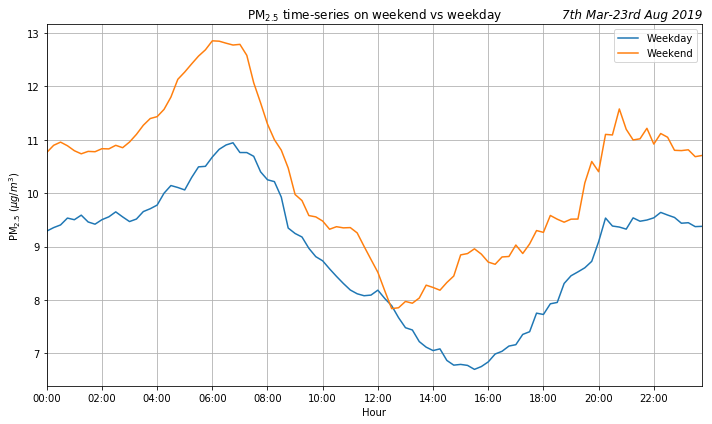

In [8]:
ax = weekday_15min_mean.plot(figsize=(10, 6), label='Weekday')
weekend_15min_mean.plot(ax=ax, label='Weekend')
plt.legend()
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.title('$\mathrm{PM}_{2.5}$ time-series on weekend vs weekday')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday_15minTimeSeries.png', dpi=300)

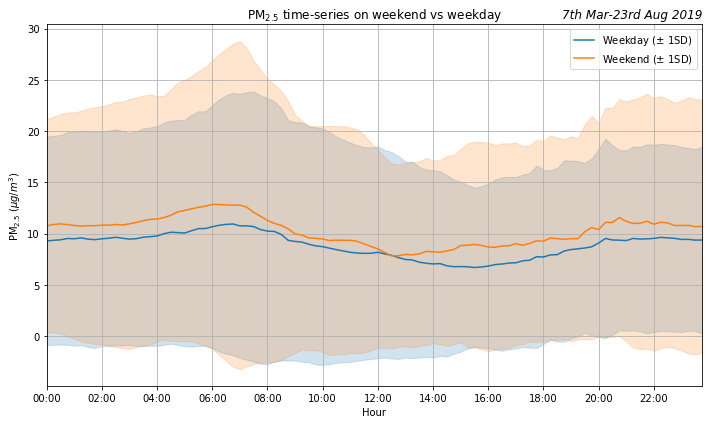

In [9]:
ax = weekday_15min_mean.plot(figsize=(10, 6), label='Weekday ($\pm$ 1SD)')
plt.fill_between(weekday_15min_mean.index, weekday_15min_mean - weekday_15min_std, weekday_15min_mean + weekday_15min_std, alpha=0.2, color='C0')
weekend_15min_mean.plot(ax=ax, label='Weekend ($\pm$ 1SD)')
plt.fill_between(weekend_15min_mean.index, weekend_15min_mean - weekend_15min_std, weekend_15min_mean + weekend_15min_std, alpha=0.2, color='C1')
plt.legend()
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.title('$\mathrm{PM}_{2.5}$ time-series on weekend vs weekday')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday_15minTimeSeries_WithUncertainty.png', dpi=300)